In [1]:
# scipy.stats.wilcoxon

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

import scipy.stats as stats

In [3]:
df = pd.read_csv('../data/kandidater_data.csv').dropna()

In [4]:
df['age'] = 2022 - df.Birthdate.str[:4].astype(int)

In [5]:
def propensity(df, y, onehotvars=[], minmaxvars=[]):
    clf = LogisticRegression()

    ct = ColumnTransformer([
        ('scaler', MinMaxScaler(), minmaxvars),
        ('one hot', OneHotEncoder(), onehotvars)
    ])

    pipe = Pipeline([
        ('column transformer', ct), 
        ('logistic reg', clf)
    ])
    
    pipe.fit(df, y)
    df['propensity'] = pipe.predict_proba(df)[:, 1]

In [6]:
def match(df1, df2):
    x = df1.propensity.to_numpy().reshape(-1, 1)
    y = df2.propensity.to_numpy().reshape(-1, 1)
    nn = NearestNeighbors(n_neighbors=1)
    nn.fit(x)
    _, idx = nn.kneighbors(y)
    return df1.iloc[idx.reshape(-1)], df2

In [7]:
def match2(df1, df2):
    x = df2.propensity.to_numpy().reshape(-1, 1)
    y = df1.propensity.to_numpy().reshape(-1, 1)
    nn = NearestNeighbors(n_neighbors=1)
    nn.fit(x)
    _, idx = nn.kneighbors(y)
    return df2.iloc[idx.reshape(-1)], df1

In [8]:
params = {
    'onehotvars': ['CurrentPartyCode', 'Profession', 'Education'],
    'minmaxvars': ['age']
}

In [9]:
y = df['Gender'].map({'M': 1, 'F': 0}).to_numpy()
propensity(df, y, **params)

In [10]:
mask = df.Gender == 'F'
df1 = df[mask]
df2 = df[~mask]

In [11]:
df1, df2 = match2(df1, df2)

In [12]:
_, p_values = stats.ttest_rel(df1[[str(i) for i in range(1, 26)]], df2[[str(i) for i in range(1, 26)]])

In [13]:
np.where(p_values <= 0.002)

(array([15], dtype=int64),)

In [14]:
plt.style.use('ggplot')

In [15]:
mask = df.Gender == 'M'
g1 = df[mask]
g2 = df[~mask]

In [16]:
bar_params = {
    'height': 0.4,
    'alpha': .7
}

hist_params = {
    'alpha': .4
}

male_params = {
    'color': '#1f77b4',
    'label': 'M'
}

female_params = {
    'color': '#d62728',
    'label': 'F'
}

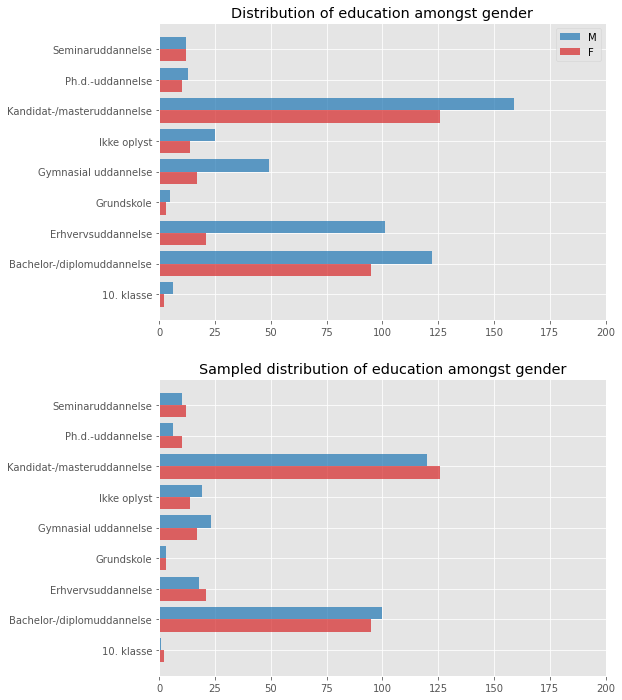

In [17]:
fig, axes = plt.subplots(2, figsize=(8,12))

x = np.arange(df.Education.nunique())

# fig1
ax = axes[1]

labels, y = np.unique(df1.Education, return_counts=True)
idx = np.argsort(y)
ax.barh(x+bar_params['height']/2, y, **bar_params, **male_params)

_, y = np.unique(df2.Education, return_counts=True)
ax.barh(x-bar_params['height']/2, y, **bar_params, **female_params)
ax.set_title('Sampled distribution of education amongst gender')


# fig2
ax = axes[0]

labels, y = np.unique(g1.Education, return_counts=True)
ax.barh(x+bar_params['height']/2, y, **bar_params, **male_params)

_, y = np.unique(g2.Education, return_counts=True)
ax.barh(x-bar_params['height']/2, y, **bar_params, **female_params)
ax.set_title('Distribution of education amongst gender')
ax.legend()



for ax in axes:
    ax.set_yticks(x)
    ax.set_yticklabels(labels)
    ax.set_xlim(0, 200)

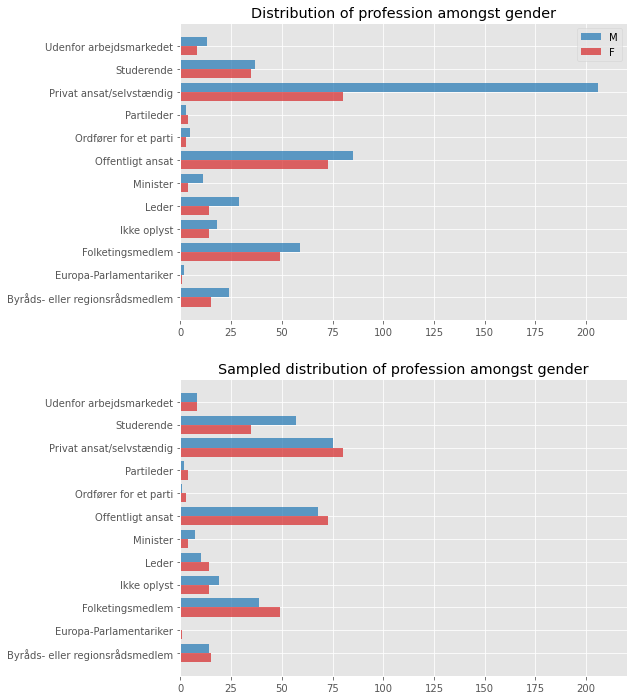

In [18]:
fig, axes = plt.subplots(2, figsize=(8,12))

x = np.arange(df.Profession.nunique())


# fig1
ax = axes[1]

labels, y = np.unique(df1.Profession, return_counts=True)
y = np.insert(y, 1, 0)
ax.barh(x+bar_params['height']/2, y, **bar_params, **male_params)

_, y = np.unique(df2.Profession, return_counts=True)
ax.barh(x-bar_params['height']/2, y, **bar_params, **female_params)
ax.set_title('Sampled distribution of profession amongst gender')


# fig2
ax = axes[0]

labels, y = np.unique(g1.Profession, return_counts=True)
ax.barh(x+bar_params['height']/2, y, **bar_params, **male_params)

_, y = np.unique(g2.Profession, return_counts=True)
ax.barh(x-bar_params['height']/2, y, **bar_params, **female_params)
ax.set_title('Distribution of profession amongst gender')
ax.legend()


for ax in axes:
    ax.set_yticks(x)
    ax.set_yticklabels(labels)
    ax.set_xlim(0, 220)

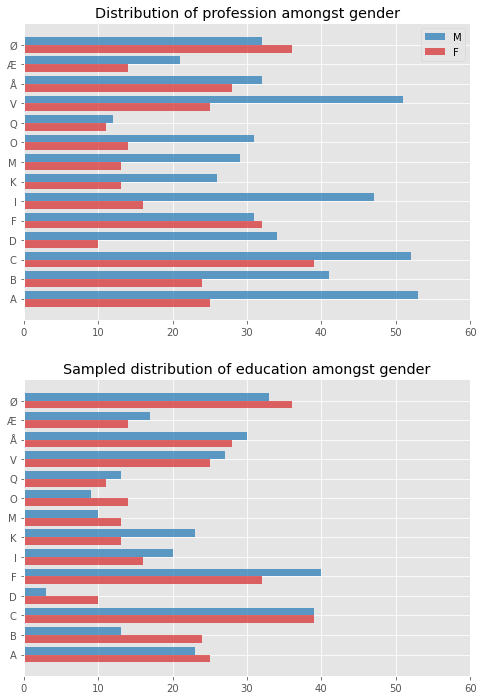

In [19]:
fig, axes = plt.subplots(2, figsize=(8,12))

x = np.arange(df.CurrentPartyCode.nunique())


# fig1
ax = axes[1]

labels, y = np.unique(df1.CurrentPartyCode, return_counts=True)
ax.barh(x+bar_params['height']/2, y, **bar_params, **male_params)

_, y = np.unique(df2.CurrentPartyCode, return_counts=True)
ax.barh(x-bar_params['height']/2, y, **bar_params, **female_params)
ax.set_title('Sampled distribution of education amongst gender')


# fig2
ax = axes[0]

labels, y = np.unique(g1.CurrentPartyCode, return_counts=True)
ax.barh(x+bar_params['height']/2, y, **bar_params, **male_params)

_, y = np.unique(g2.CurrentPartyCode, return_counts=True)
ax.barh(x-bar_params['height']/2, y, **bar_params, **female_params)
ax.set_title('Distribution of profession amongst gender')
ax.legend()


for ax in axes:
    ax.set_yticks(x)
    ax.set_yticklabels(labels)
    ax.set_xlim(0, 60)